In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/375666/lesson_3_data.csv', encoding='windows-1251')

In [3]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})

In [7]:
def split_column(split_name):
    return split_name.split(' ')[-1]

In [8]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [50]:
user_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name':'count'}) \
    .rename(columns={'brand_name':'purchases'}) \
    .query('purchases>=5')

In [51]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name':'nunique'}) \
    .rename(columns={'brand_name':'unique_brands'})

In [52]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info':'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'})

In [56]:
loyalty_df = user_purchases.merge(user_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [63]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1].sort_values('purchases', ascending=False)

In [64]:
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
1315,19317282,55,1,Brand_4,55
1652,27291281,36,1,Brand_4,36
1407,20835112,27,1,Brand_4,27
2330,72232811,25,1,Brand_4,25
1937,38450591,24,1,Brand_4,24
...,...,...,...,...,...
1853,32606341,5,1,Store_Brand,5
1839,32015911,5,1,Brand_4,5
1794,30403191,5,1,Brand_4,5
1789,30354881,5,1,Brand_4,5


In [65]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [74]:
loyalty_df['loyalty_score'] = (loyalty_df.lovely_brand_purchases/loyalty_df.purchases).round(4)

In [75]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.8333
1,4241,5,2,Brand_4,3,0.6000
2,25971,7,2,Store_Brand,5,0.7143
3,40911,27,5,Brand_4,19,0.7037
4,45181,5,4,Store_Brand,2,0.4000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.0000
3379,1408783189,10,2,Store_Brand,8,0.8000
3380,1408783379,6,2,Brand_1,4,0.6667
3381,1408798879,8,3,Store_Brand,4,0.5000


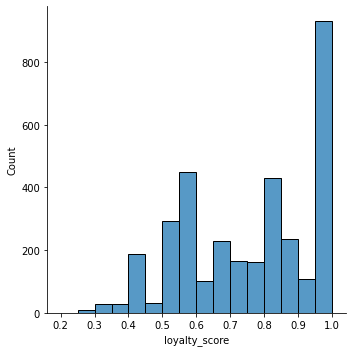

In [84]:
ax = sns.displot(loyalty_df.loyalty_score, kde=False)

In [86]:
loyalty_df.loyalty_score.median()

0.8

In [87]:
loyalty_df.loyalty_score.mean()

0.7593572568725983

In [108]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score':'median', 'user_id':'count'}) \
    .rename(columns={'user_id':'purchases_brands_loyalty'}) \
    .sort_values(['loyalty_score', 'purchases_brands_loyalty'], ascending=[False, False])

In [109]:
brands_loyalty

,lovely_brand,loyalty_score,purchases_brands_loyalty
3,Brand_4,0.8182,2041
6,Store_Brand,0.7500,715
0,Brand_1,0.6795,410
1,Brand_2,0.6000,88
4,Brand_5,0.6000,5
2,Brand_3,0.5000,115
5,Brand_7,0.4444,9


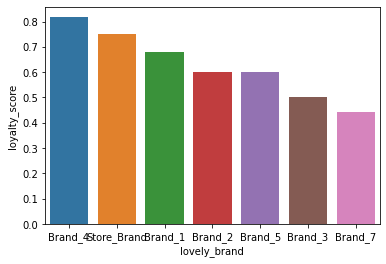

In [110]:
ax = sns.barplot(x='lovely_brand', y='loyalty_score', data=brands_loyalty)

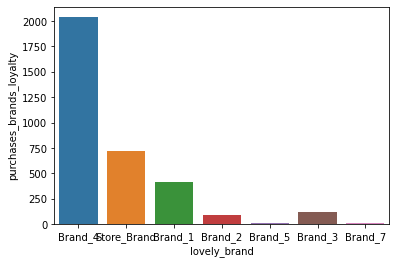

In [111]:
ax = sns.barplot(x='lovely_brand', y='purchases_brands_loyalty', data=brands_loyalty)